<a href="https://colab.research.google.com/github/Akshay4729/Heart-Disease-Data-Analisys/blob/main/Heart_Disease_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [ ]:
health = pd.read_csv('/content/Heart Disease data.csv')

# **Feature Engineering**

In [ ]:
health.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
health.shape

(1025, 14)

In [ ]:
health.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
health.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Renaming Column**s

In [ ]:
health.rename(columns={'age':'Age','sex':'Sex','cp':'Chest Pain Type','trestbps':'Resting Blood Pressure','chol':'Serum Cholestoral in mg/dl','fbs':'Fasting Blood Sugar','restecg':'Resting Electrocardiographic Results'},inplace=True)

In [ ]:
health.rename(columns={'thalach':'Maximum Heartrate Achieved','exang':'Exercise Induced Angina','oldpeak':'ST Depression','slope':'ST Segment','ca':'Colored by Flourosopy'},inplace=True)

In [ ]:
health.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral in mg/dl,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heartrate Achieved,Exercise Induced Angina,ST Depression,ST Segment,Colored by Flourosopy,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
health['Resting Electrocardiographic Results'].value_counts()

1    513
0    497
2     15
Name: Resting Electrocardiographic Results, dtype: int64

# **Checking And Changing Numerical And Categorical Columns**

In [ ]:
health['Sex']= health['Sex'].values.astype(str)

In [ ]:
health['target']= health['target'].values.astype(str)

In [ ]:
health['Fasting Blood Sugar']= health['Fasting Blood Sugar'].values.astype(str)

In [ ]:
health['Chest Pain Type']= health['Chest Pain Type'].values.astype(str)

In [ ]:
health['thal']= health['thal'].values.astype(str)

In [ ]:
health['ST Segment']= health['ST Segment'].values.astype(str)

In [ ]:
health['Exercise Induced Angina']= health['Exercise Induced Angina'].values.astype(str)

In [ ]:
health['Sex'].replace("0","Female",inplace=True)
health['Sex'].replace("1","Male",inplace=True)


In [ ]:
health['Sex'].value_counts()

Male      713
Female    312
Name: Sex, dtype: int64

In [ ]:
health['Fasting Blood Sugar'].replace('0','False',inplace=True)
health['Fasting Blood Sugar'].replace('1','True',inplace=True)

In [ ]:
health['Fasting Blood Sugar'].value_counts()

False    872
True     153
Name: Fasting Blood Sugar, dtype: int64

In [ ]:
health['Chest Pain Type'].replace("0","asymptomatic",inplace=True)
health['Chest Pain Type'].replace("1","atypical angina",inplace=True)
health['Chest Pain Type'].replace("2","non-anginal pain",inplace=True)
health['Chest Pain Type'].replace("3","typical angina",inplace=True)

In [ ]:
health['Chest Pain Type'].value_counts()

asymptomatic        497
non-anginal pain    284
atypical angina     167
typical angina       77
Name: Chest Pain Type, dtype: int64

In [ ]:
health['target'].replace("0","No Disease",inplace=True)
health['target'].replace("1","Disease",inplace=True)

In [ ]:
health['target'].value_counts()

Disease       526
No Disease    499
Name: target, dtype: int64

In [ ]:
health['thal'].replace("0","normal",inplace=True)
health['thal'].replace("1","fixed defect",inplace=True)
health['thal'].replace("2","normal blood flow",inplace=True)
health['thal'].replace("3","reversable defect",inplace=True)

In [ ]:
health['thal'].value_counts()

normal blood flow    544
reversable defect    410
fixed defect          64
normal                 7
Name: thal, dtype: int64

In [ ]:
health['ST Segment'].replace("0","downsloping",inplace=True)
health['ST Segment'].replace("1","flat",inplace=True)
health['ST Segment'].replace("2","upsloping",inplace=True)

In [ ]:
health['ST Segment'].value_counts()

flat           482
upsloping      469
downsloping     74
Name: ST Segment, dtype: int64

In [ ]:
health['Exercise Induced Angina'].replace("1","Yes",inplace=True)
health['Exercise Induced Angina'].replace("0","No",inplace=True)


In [ ]:
health['Exercise Induced Angina'].value_counts()

No     680
Yes    345
Name: Exercise Induced Angina, dtype: int64

In [ ]:
health.select_dtypes(include=[object]).head()

,Sex,Chest Pain Type,Fasting Blood Sugar,Exercise Induced Angina,ST Segment,thal,target
0,Male,asymptomatic,False,No,upsloping,reversable defect,No Disease
1,Male,asymptomatic,True,Yes,downsloping,reversable defect,No Disease
2,Male,asymptomatic,False,Yes,downsloping,reversable defect,No Disease
3,Male,asymptomatic,False,No,upsloping,reversable defect,No Disease
4,Female,asymptomatic,True,No,flat,normal blood flow,No Disease


In [ ]:
health.select_dtypes(include=[int,float]).head()

,Age,Resting Blood Pressure,Serum Cholestoral in mg/dl,Resting Electrocardiographic Results,Maximum Heartrate Achieved,ST Depression,Colored by Flourosopy
0,52,125,212,1,168,1.0,2
1,53,140,203,0,155,3.1,0
2,70,145,174,1,125,2.6,0
3,61,148,203,1,161,0.0,1
4,62,138,294,1,106,1.9,3


# **Analyzing Columns**

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   1025 non-null   int64  
 1   Sex                                   1025 non-null   object 
 2   Chest Pain Type                       1025 non-null   object 
 3   Resting Blood Pressure                1025 non-null   int64  
 4   Serum Cholestoral in mg/dl            1025 non-null   int64  
 5   Fasting Blood Sugar                   1025 non-null   object 
 6   Resting Electrocardiographic Results  1025 non-null   int64  
 7   Maximum Heartrate Achieved            1025 non-null   int64  
 8   Exercise Induced Angina               1025 non-null   object 
 9   ST Depression                         1025 non-null   float64
 10  ST Segment                            1025 non-null   object 
 11  Colored by Flouro

In [ ]:
health.describe()

,Age,Resting Blood Pressure,Serum Cholestoral in mg/dl,Resting Electrocardiographic Results,Maximum Heartrate Achieved,ST Depression,Colored by Flourosopy
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,0.529756,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,0.527878,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,1.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,1.000000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,2.000000,202.000000,6.200000,4.000000


# **EDA**

# **Analyzing Each Numerical Columns**

<AxesSubplot:xlabel='Age'>

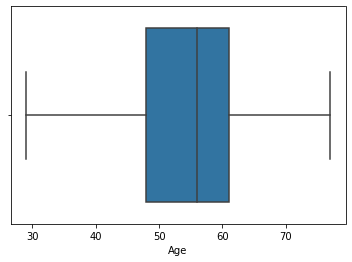

In [ ]:
sns.boxplot(health['Age'])

In [ ]:
Age_Group = []
for x in health['Age']:
  if(x>=20 and x<=40):
    Age_Group.append('20-40')
  elif(x>=41 and x<=60):
    Age_Group.append('41-60')
  elif(x>=61 and x<=80):
    Age_Group.append('61-80')

In [ ]:
health['Age_Group']=Age_Group
health['Age_Group'].value_counts()

41-60    685
61-80    272
20-40     68
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Resting Blood Pressure'>

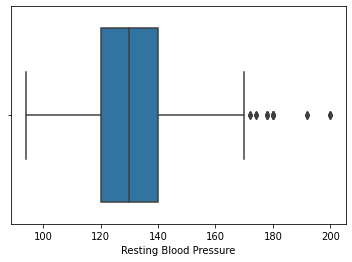

In [ ]:
sns.boxplot(health['Resting Blood Pressure'])

<AxesSubplot:xlabel='Serum Cholestoral in mg/dl'>

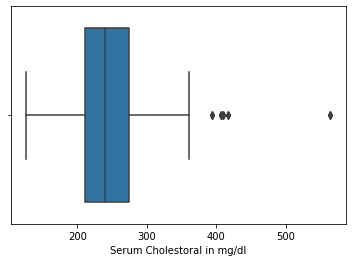

In [ ]:
sns.boxplot(health['Serum Cholestoral in mg/dl'])

<AxesSubplot:xlabel='Resting Electrocardiographic Results'>

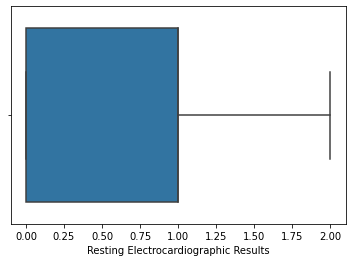

In [ ]:
sns.boxplot(health['Resting Electrocardiographic Results'])

<AxesSubplot:xlabel='Maximum Heartrate Achieved'>

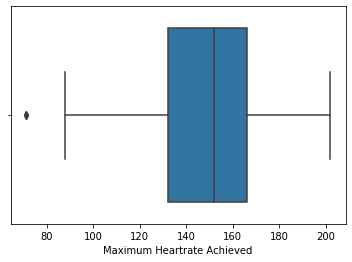

In [ ]:
sns.boxplot(health['Maximum Heartrate Achieved'])

<AxesSubplot:xlabel='ST Depression'>

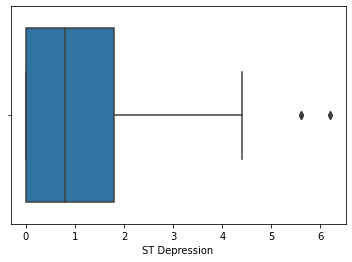

In [ ]:
sns.boxplot(health['ST Depression'])

<AxesSubplot:xlabel='Colored by Flourosopy'>

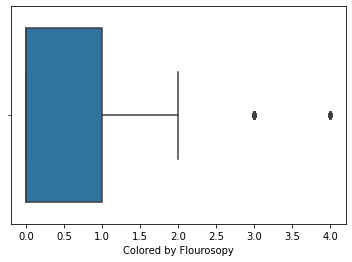

In [ ]:
sns.boxplot(health['Colored by Flourosopy'])

# **Exploration**

In [ ]:
health.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral in mg/dl,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heartrate Achieved,Exercise Induced Angina,ST Depression,ST Segment,Colored by Flourosopy,thal,target,Age_Group
0,52,Male,asymptomatic,125,212,False,1,168,No,1.0,upsloping,2,reversable defect,No Disease,41-60
1,53,Male,asymptomatic,140,203,True,0,155,Yes,3.1,downsloping,0,reversable defect,No Disease,41-60
2,70,Male,asymptomatic,145,174,False,1,125,Yes,2.6,downsloping,0,reversable defect,No Disease,61-80
3,61,Male,asymptomatic,148,203,False,1,161,No,0.0,upsloping,1,reversable defect,No Disease,61-80
4,62,Female,asymptomatic,138,294,True,1,106,No,1.9,flat,3,normal blood flow,No Disease,61-80


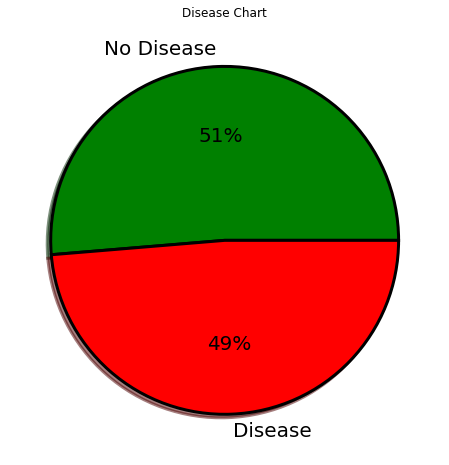

In [ ]:
plt.figure(figsize = (10,8))

plt.pie(health['target'].value_counts(),labels = health['target'].unique(),
        autopct='%.0f%%',wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'},
        textprops = {'fontsize':20},colors = ['g','r'],shadow = True)

plt.title("Disease Chart")                         
plt.show()

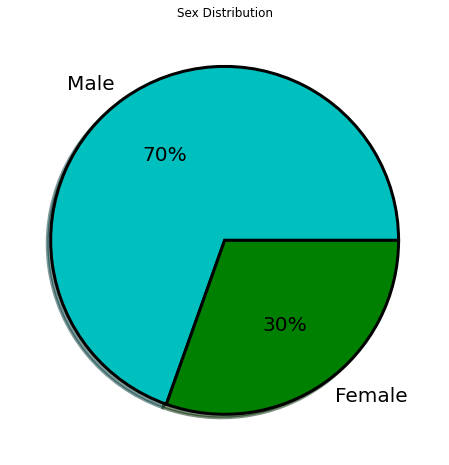

In [ ]:
plt.figure(figsize = (10,8))

plt.pie(health['Sex'].value_counts(),labels = health['Sex'].unique(),
        autopct='%.0f%%',wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'},
        textprops = {'fontsize':20},colors = ['c','g'],shadow = True)

plt.title("Sex Distribution")                         
plt.show()

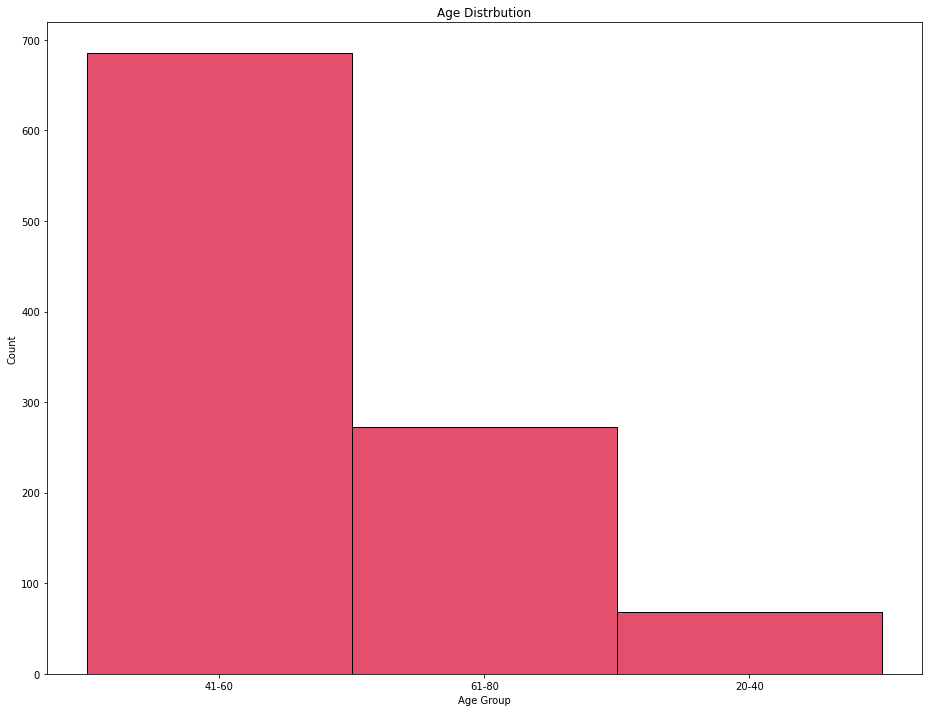

In [ ]:
plt.figure(figsize = (13,10))
sns.histplot(data = health ,x = 'Age_Group',color = 'crimson',bins = 6)

plt.title("Age Distrbution")                         
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

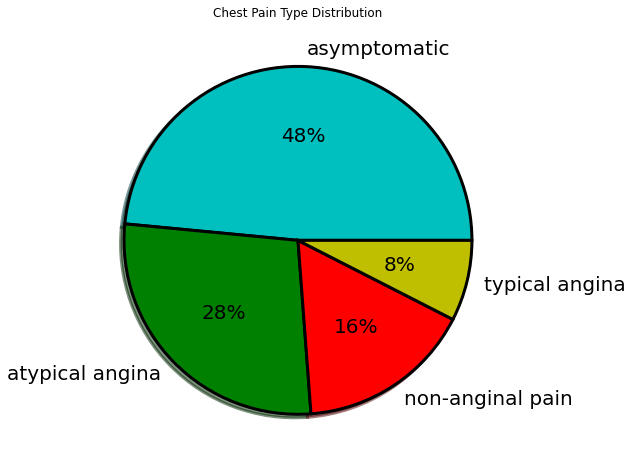

In [ ]:
plt.figure(figsize = (10,8))

plt.pie(health['Chest Pain Type'].value_counts(),labels = health['Chest Pain Type'].unique(),
        autopct='%.0f%%',wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'},
        textprops = {'fontsize':20},colors = ['c','g','r','y'],shadow = True)

plt.title("Chest Pain Type Distribution")                         
plt.show()

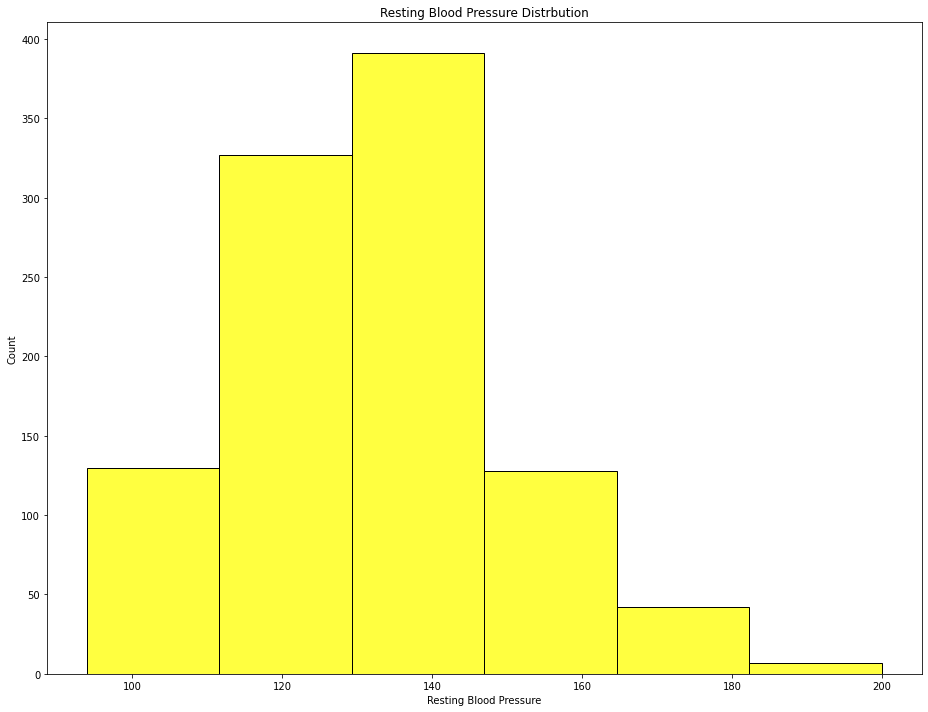

In [ ]:
plt.figure(figsize = (13,10))
sns.histplot(data = health ,x = 'Resting Blood Pressure',color = 'yellow',bins = 6)

plt.title("Resting Blood Pressure Distrbution")                         
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

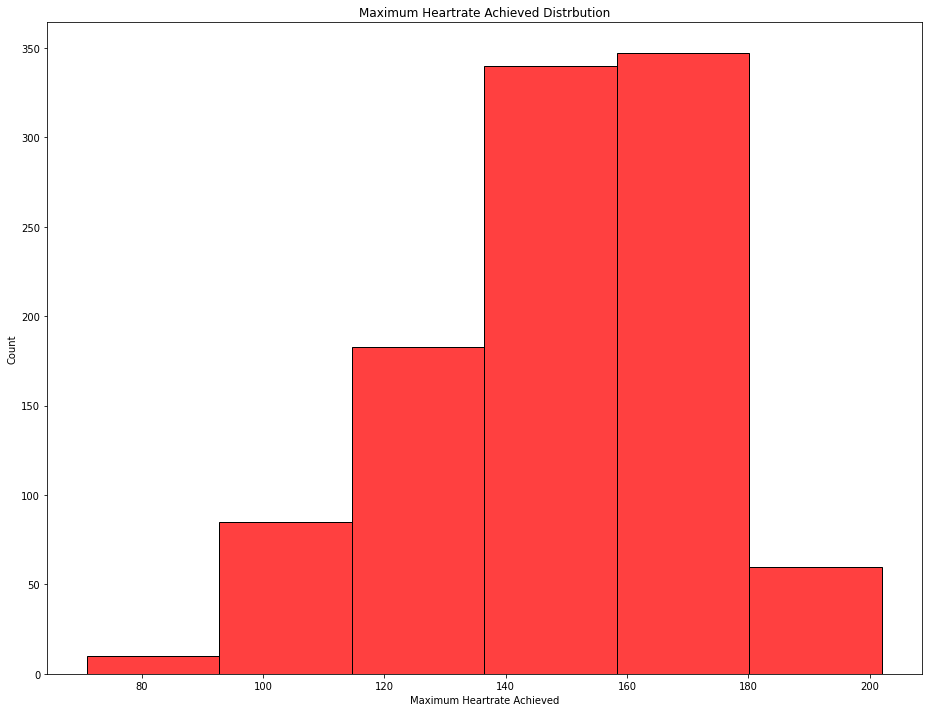

In [ ]:
plt.figure(figsize = (13,10))
sns.histplot(data = health ,x = 'Maximum Heartrate Achieved',color = 'red',bins = 6)

plt.title("Maximum Heartrate Achieved Distrbution")                         
plt.xlabel('Maximum Heartrate Achieved')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Chest Pain Type v/s Fasting Blood Sugar\n')

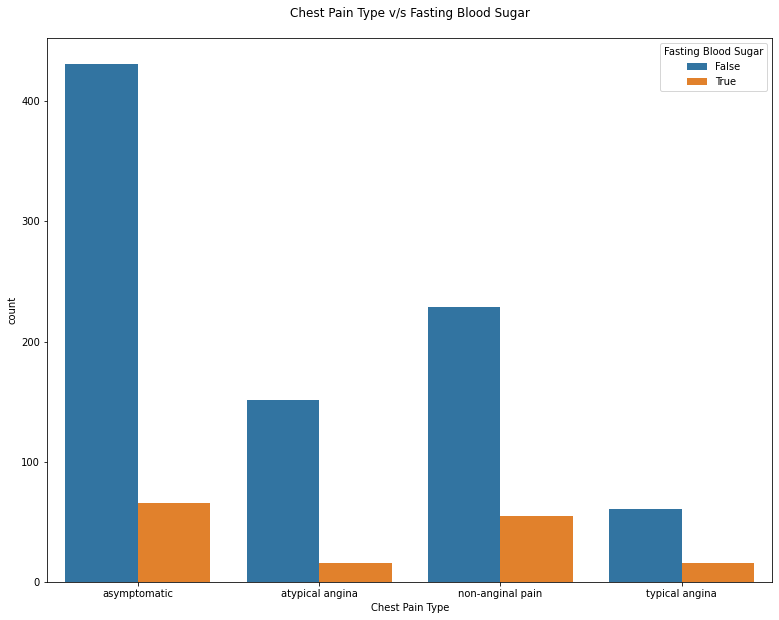

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Chest Pain Type',hue='Fasting Blood Sugar')
plt.title('Chest Pain Type v/s Fasting Blood Sugar\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

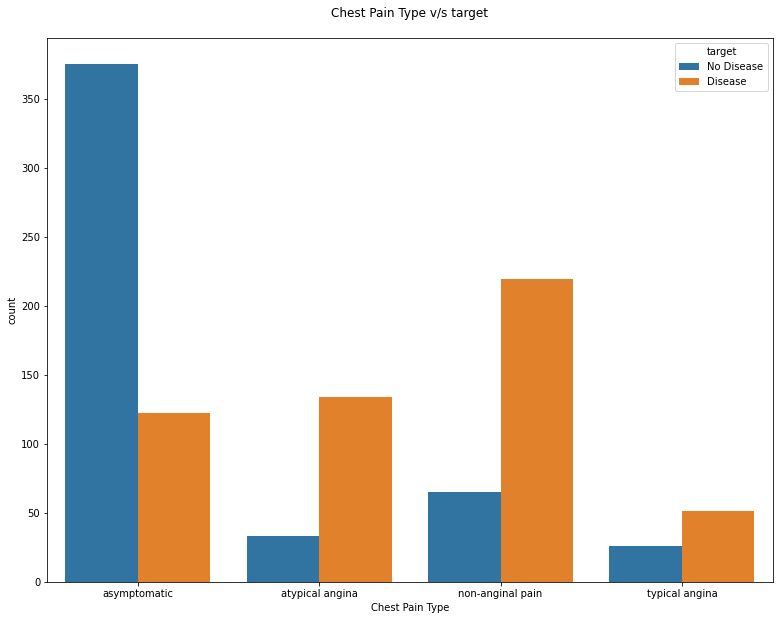

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Chest Pain Type',hue='target')
plt.title('Chest Pain Type v/s target\n')

Text(0.5, 1.0, 'Sex v/s thal\n')

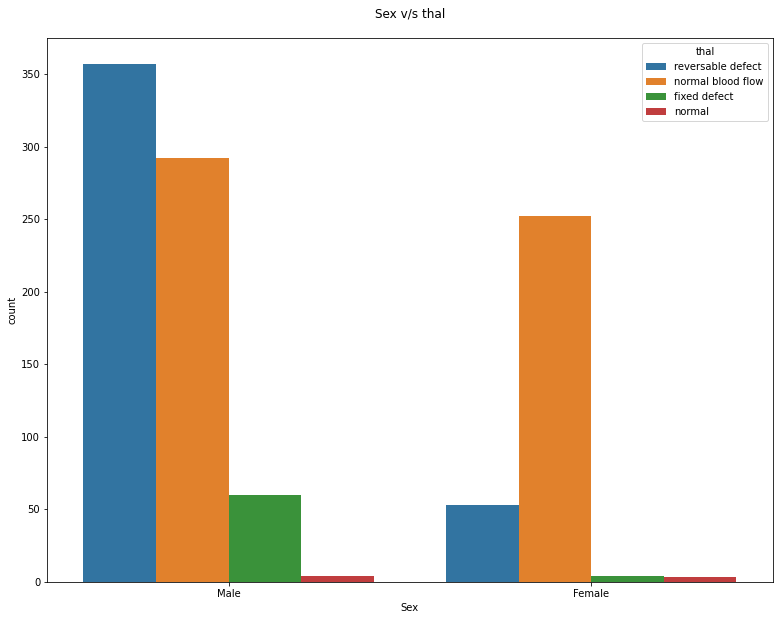

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Sex',hue='thal')
plt.title('Gender v/s thal\n')

Text(0.5, 1.0, 'ST Segment v/s target\n')

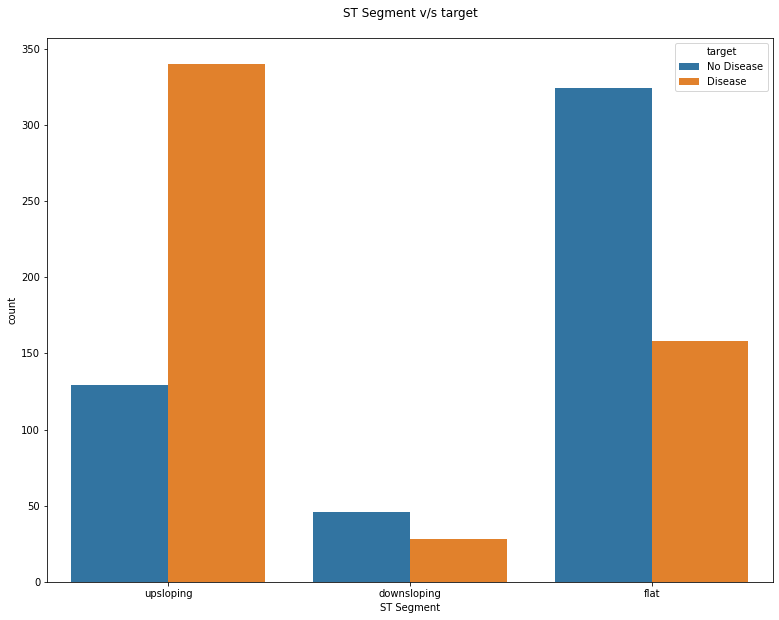

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='ST Segment',hue='target')
plt.title('ST Segment v/s target\n')

Text(0.5, 1.0, 'Exercise Induced Angina v/s thal\n')

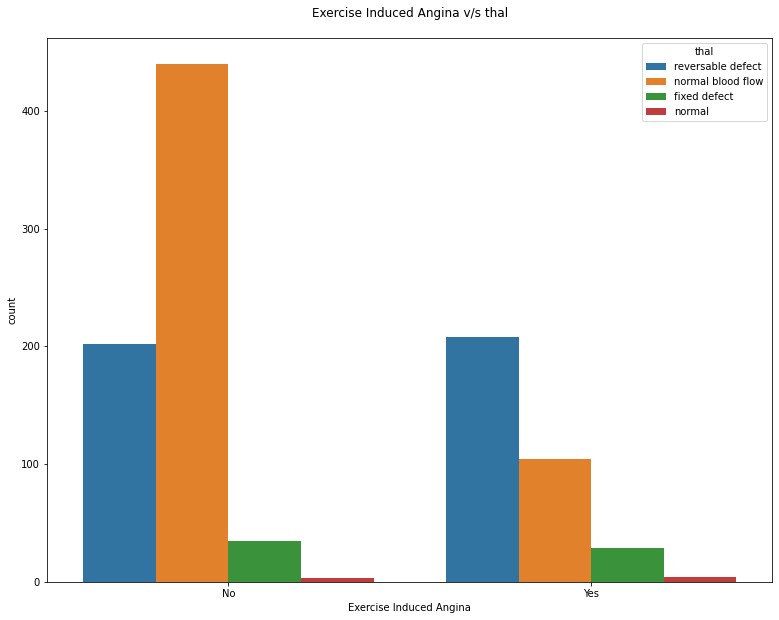

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Exercise Induced Angina',hue='thal')
plt.title('Exercise Induced Angina v/s thal\n')

Text(0.5, 1.0, 'Sex v/s target\n')

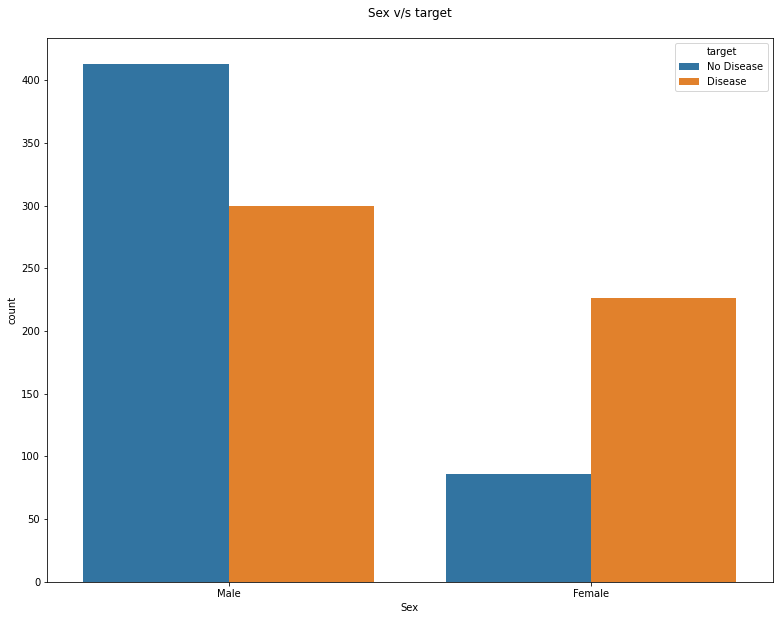

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Sex v/s Chest Pain Type\n')

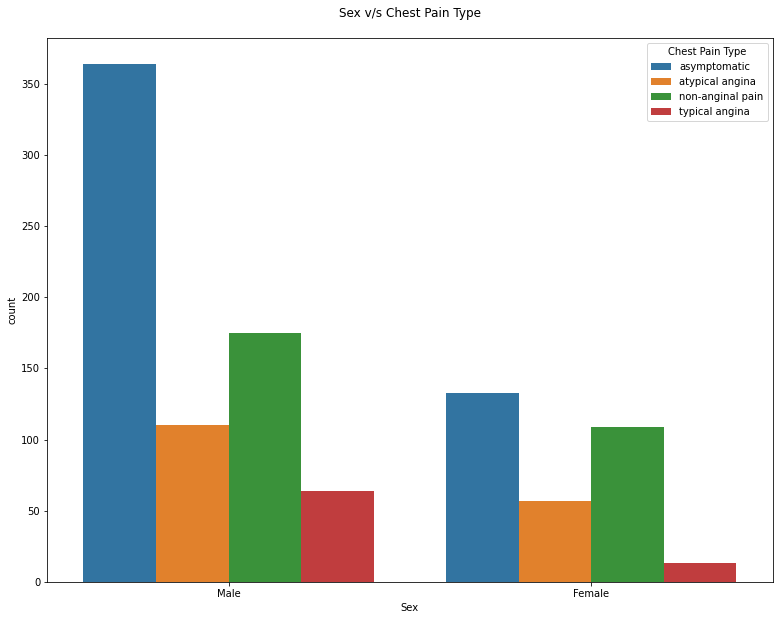

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Sex',hue='Chest Pain Type')
plt.title('Gender v/s Chest Pain Type\n')

Text(0.5, 1.0, 'Exercise Induced Angina v/s Chest Pain Type\n')

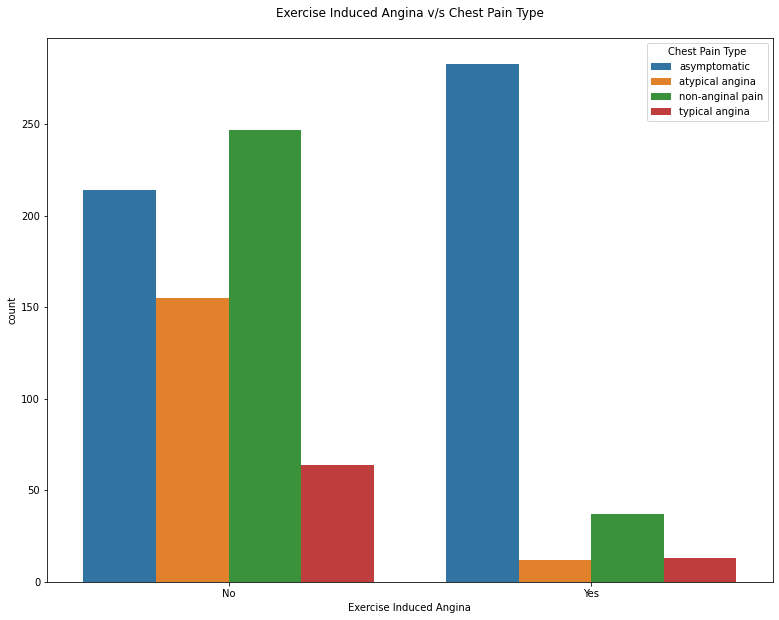

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Exercise Induced Angina',hue='Chest Pain Type')
plt.title('Exercise Induced Angina v/s Chest Pain Type\n')

Text(0.5, 1.0, ' Gender v/s ST Segment\n')

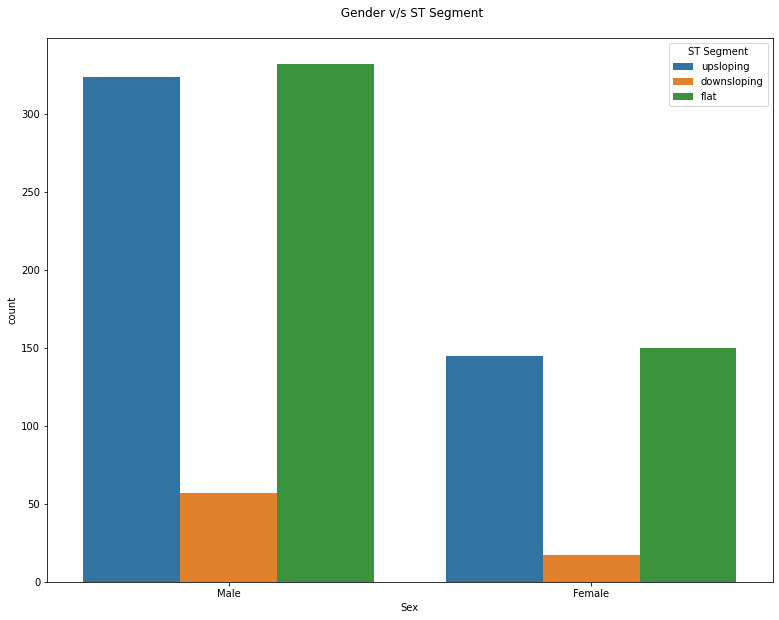

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(data= health, x='Sex',hue='ST Segment')
plt.title(' Gender v/s ST Segment\n')

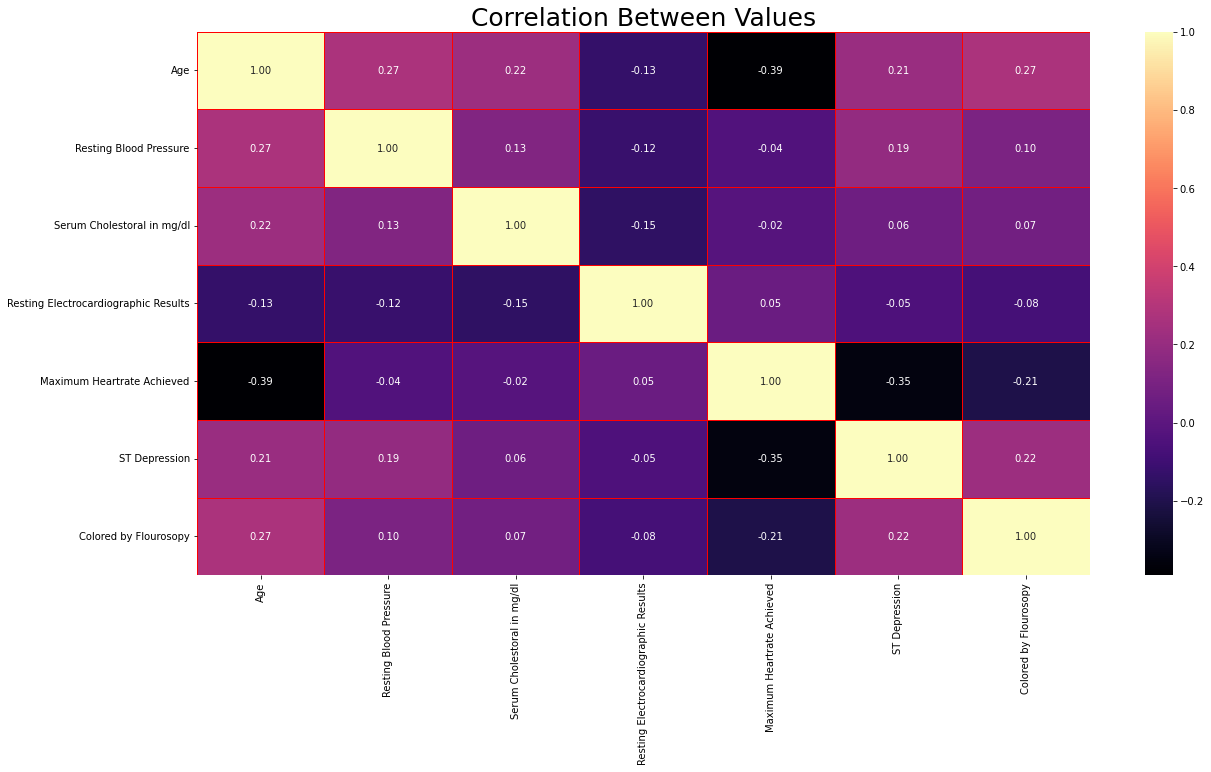

In [ ]:
plt.figure(figsize = (20,10))                                                         

sns.heatmap(health.corr(),annot = True, linewidth = 1,fmt='.2f',cmap="magma",linecolor='red')                            

plt.title('Correlation Between Values',fontsize = 25)
plt.show()

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(health)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]